# 1. 데이터 로드

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


rankings = pd.read_csv('data/rankings.csv')
matches = pd.read_csv('data/results.csv')
world_cup = pd.read_excel('data/월드컵 2022 데이터베이스.xlsx')
df = pd.read_csv('data/international_matches.csv') # 나라별 공격점수, 방어점수, 미드필더 점수가 있는 데이터

In [2]:
rankings.head()

,rank,country_full,country_abrv,cur_year_avg_weighted,rank_date,two_year_ago_weighted,three_year_ago_weighted
0,1,Germany,GER,0.0,1947-08-10,0.0,0.0
1,2,Italy,ITA,0.0,1947-08-10,0.0,0.0
2,3,Switzerland,SUI,0.0,1947-08-10,0.0,0.0
3,4,Sweden,SWE,0.0,1947-08-10,0.0,0.0
4,5,Argentina,ARG,0.0,1947-08-10,0.0,0.0


In [3]:
rankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173379 entries, 0 to 173378
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   rank                     173379 non-null  int64  
 1   country_full             173379 non-null  object 
 2   country_abrv             173379 non-null  object 
 3   cur_year_avg_weighted    173379 non-null  float64
 4   rank_date                173379 non-null  object 
 5   two_year_ago_weighted    173379 non-null  float64
 6   three_year_ago_weighted  173379 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 9.3+ MB


- rankings 데이터는 결측치가 없음
- rank_date 컬럼이 object 형이기 때문에 날짜 타입으로 바꿔줘야함

In [4]:
rankings['rank_date'] = pd.to_datetime(rankings['rank_date'])

- 최근 3년간 피파랭킹 산정에 사용된 가중치들의 합계 컬럼 생성

In [5]:
rankings['weighted_points'] =  rankings['cur_year_avg_weighted'] + rankings['two_year_ago_weighted'] + rankings['three_year_ago_weighted']

In [6]:
rankings['country_full'].unique()

array(['Germany', 'Italy', 'Switzerland', 'Sweden', 'Argentina',
       'Republic of Ireland', 'Russia', 'Brazil', 'Norway', 'Denmark',
       'England', 'France', 'Spain', 'Mexico', 'RCS', 'Netherlands',
       'Nigeria', 'Belgium', 'Colombia', 'Poland', 'Romania', 'Uruguay',
       'Portugal', 'Cameroon', 'Zambia', 'Egypt', 'Wales', 'USA',
       "CÃ´te d'Ivoire", 'Scotland', 'Tunisia', 'Greece', 'Morocco',
       'Algeria', 'Ecuador', 'Korea Republic', 'Bulgaria', 'Austria',
       'Costa Rica', 'Northern Ireland', 'Honduras', 'Hungary', 'Japan',
       'Saudi Arabia', 'China PR', 'Canada', 'Finland', 'Ghana', 'Chile',
       'Zimbabwe', 'Qatar', 'Australia', 'Iceland', 'Iran',
       'United Arab Emirates', 'Yugoslavia', 'Iraq', 'Senegal', 'Bolivia',
       'Kuwait', 'Korea DPR', 'El Salvador', 'Turkey', 'Gabon', 'Guinea',
       'Thailand', 'Paraguay', 'Malawi', 'Israel', 'Peru', 'Zaire',
       'Cyprus', 'Singapore', 'Mali', 'Malaysia', 'Bermuda', 'Niger',
       'Syria', 'Bahrai

In [7]:
matches.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [8]:
matches['date'] = pd.to_datetime(matches['date'])

In [9]:
world_cup.head()

,Team,Group,Previous \n appearances,Previous \n titles,Previous\n finals,Previous\n semifinals,Current \n FIFA rank,First match \n against,Match index,history with \n first opponent\n W-L,history with\n first opponent\n goals,Second match\n against,Match index.1,history with\n second opponent\n W-L,history with\n second opponent\n goals,Third match\n against,Match index.2,history with\n third opponent\n W-L,history with\n third opponent\n goals
0,Qatar,A,0,0,0,0,50,Ecuador,1,1.0,1.0,Senegal,17,NaN,NaN,Netherlands,33,NaN,NaN
1,Ecuador,A,3,0,0,0,44,Qatar,1,-1.0,-1.0,Netherlands,18,-1.0,-1.0,Senegal,34,-1.0,-1.0
2,Senegal,A,2,0,0,0,18,Netherlands,2,NaN,NaN,Qatar,17,NaN,NaN,Ecuador,34,1.0,1.0
3,Netherlands,A,10,0,3,5,8,Senegal,2,NaN,NaN,Ecuador,18,1.0,1.0,Qatar,33,NaN,NaN
4,England,B,15,1,1,3,5,Iran,3,NaN,NaN,USA,19,2.0,5.0,Wales,35,10.0,21.0


In [10]:
world_cup = world_cup.set_index('Team')

In [11]:
world_cup.head()

,Group,Previous \n appearances,Previous \n titles,Previous\n finals,Previous\n semifinals,Current \n FIFA rank,First match \n against,Match index,history with \n first opponent\n W-L,history with\n first opponent\n goals,Second match\n against,Match index.1,history with\n second opponent\n W-L,history with\n second opponent\n goals,Third match\n against,Match index.2,history with\n third opponent\n W-L,history with\n third opponent\n goals
Team,,,,,,,,,,,,,,,,,,
Qatar,A,0,0,0,0,50,Ecuador,1,1.0,1.0,Senegal,17,NaN,NaN,Netherlands,33,NaN,NaN
Ecuador,A,3,0,0,0,44,Qatar,1,-1.0,-1.0,Netherlands,18,-1.0,-1.0,Senegal,34,-1.0,-1.0
Senegal,A,2,0,0,0,18,Netherlands,2,NaN,NaN,Qatar,17,NaN,NaN,Ecuador,34,1.0,1.0
Netherlands,A,10,0,3,5,8,Senegal,2,NaN,NaN,Ecuador,18,1.0,1.0,Qatar,33,NaN,NaN
England,B,15,1,1,3,5,Iran,3,NaN,NaN,USA,19,2.0,5.0,Wales,35,10.0,21.0


world_cup.columns

In [12]:
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df['date'] = pd.to_datetime(df['date'])

In [14]:
# matches와 컬럼 병합
df = pd.merge(matches, df) 

In [15]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'neutral_location', 'shoot_out',
       'home_team_result', 'home_team_goalkeeper_score',
       'away_team_goalkeeper_score', 'home_team_mean_defense_score',
       'home_team_mean_offense_score', 'home_team_mean_midfield_score',
       'away_team_mean_defense_score', 'away_team_mean_offense_score',
       'away_team_mean_midfield_score'],
      dtype='object')

## 가장 공격력이 강한 상위 10개 나라 확인

In [16]:
#Top 10 Strongest Offensive Team

offense = df[['date', 'home_team', 'away_team', 'home_team_mean_offense_score', 'away_team_mean_offense_score']]
home = offense [['date', 'home_team','home_team_mean_offense_score']].rename(columns = {'home_team': 'team', 'home_team_mean_offense_score' : 'offense_score'})
away = offense [['date', 'away_team','away_team_mean_offense_score']].rename(columns = {'away_team': 'team', 'away_team_mean_offense_score' : 'offense_score'})
offense  = home.append(away)
# offense
#last match that each country played
offense   = offense .sort_values(['team', 'date'], ascending=[True, False])
offense ['row_number'] = offense .groupby('team').cumcount()+1
offense_top_data = offense [offense ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'offense_score')
offense_top_data

C:\Users\오승은\AppData\Local\Temp\ipykernel_11252\769540281.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  offense  = home.append(away)


,date,team,offense_score
20169,2022-06-05,Argentina,89.0
20291,2022-06-13,France,88.3
20309,2022-06-14,England,88.0
20183,2022-06-06,Brazil,86.3
20275,2022-06-12,Portugal,86.0
20312,2022-06-14,Belgium,85.7
20310,2022-06-14,Italy,85.3
20274,2022-06-12,Spain,85.0
20312,2022-06-14,Poland,84.7
20271,2022-06-11,Uruguay,84.3


- 아르헨티나가 가장 공격점수가 높고, 프랑스, 잉글랜드 순

## 가장 수비력이 좋은 상위 10개 나라 확인

In [17]:
#Top 10 Strongest Defensive Teams?

defense = df[['date', 'home_team', 'away_team', 'home_team_mean_defense_score', 'away_team_mean_defense_score']]
home = defense [['date', 'home_team','home_team_mean_defense_score']].rename(columns = {'home_team': 'team', 'home_team_mean_defense_score' : 'defense_score'})
away = defense [['date', 'away_team','away_team_mean_defense_score']].rename(columns = {'away_team': 'team', 'away_team_mean_defense_score' : 'defense_score'})
defense  = home.append(away)
# offense
#last match that each country played
defense   = defense .sort_values(['team', 'date'], ascending=[True, False])
defense ['row_number'] = defense .groupby('team').cumcount()+1
defense_top_data = defense [offense ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'defense_score')
defense_top_data

C:\Users\오승은\AppData\Local\Temp\ipykernel_11252\2004563364.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  defense  = home.append(away)


,date,team,defense_score
20274,2022-06-12,Spain,86.5
20311,2022-06-14,Netherlands,85.2
20275,2022-06-12,Portugal,85.2
20309,2022-06-14,England,85.0
20183,2022-06-06,Brazil,84.8
20291,2022-06-13,France,84.2
20310,2022-06-14,Italy,84.2
20310,2022-06-14,Germany,84.0
20169,2022-06-05,Argentina,82.2
20286,2022-06-13,Morocco,81.2


- 스페인이 가장 수비력이 좋고, 그 다음 네덜란드, 포르투갈 순

## 가장 미드필더 점수가 좋은 상위 10개 나라

In [18]:
#Top 10 Team that have Best Midfielder?

midfield = df[['date', 'home_team', 'away_team', 'home_team_mean_midfield_score', 'away_team_mean_midfield_score']]
home = midfield [['date', 'home_team','home_team_mean_midfield_score']].rename(columns = {'home_team': 'team', 'home_team_mean_midfield_score' : 'midfield_score'})
away = midfield [['date', 'away_team','away_team_mean_midfield_score']].rename(columns = {'away_team': 'team', 'away_team_mean_midfield_score' : 'midfield_score'})
midfield  = home.append(away)
# offense
#last match that each country played
midfield   = midfield .sort_values(['team', 'date'], ascending=[True, False])
midfield ['row_number'] = defense .groupby('team').cumcount()+1
midfield_top_data = midfield [offense ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'midfield_score')
midfield_top_data

C:\Users\오승은\AppData\Local\Temp\ipykernel_11252\1373344339.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  midfield  = home.append(away)


,date,team,midfield_score
20310,2022-06-14,Germany,87.8
20291,2022-06-13,France,86.8
20274,2022-06-12,Spain,86.0
20312,2022-06-14,Belgium,85.5
20183,2022-06-06,Brazil,85.5
20310,2022-06-14,Italy,84.5
20275,2022-06-12,Portugal,84.5
20291,2022-06-13,Croatia,84.2
20169,2022-06-05,Argentina,84.0
20309,2022-06-14,England,84.0


- 독일이 가장 높으며, 그 다음 프랑스, 스페인, 벨기에 순

## 3가지 점수를 모두 고려했을 때 가장 점수가 높은 상위 10개 나라

In [19]:
#Top 10 Team which have strongest Defender, midfielder, offenser?

df['home_total_score'] = (df['home_team_mean_offense_score'] + df['home_team_mean_defense_score']+df['home_team_mean_midfield_score'])/3
df['away_total_score'] = (df['away_team_mean_offense_score'] + df['away_team_mean_defense_score']+df['away_team_mean_midfield_score'])/3
df['diff_total_score'] = df['home_total_score'] - df['away_total_score']
total_score = df[['date', 'home_team', 'away_team', 'home_total_score', 'away_total_score']]
home = total_score [['date', 'home_team','home_total_score']].rename(columns = {'home_team': 'team', 'home_total_score' : 'total_score'})
away = total_score [['date', 'away_team','away_total_score']].rename(columns = {'away_team': 'team', 'away_total_score' : 'total_score'})
total_score  = home.append(away)
# offense
#last match that each country played
total_score   = total_score .sort_values(['team', 'date'], ascending=[True, False])
total_score ['row_number'] = defense .groupby('team').cumcount()+1
total_score_top_10 = total_score [offense ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'total_score')
total_score_top_10

C:\Users\오승은\AppData\Local\Temp\ipykernel_11252\3365371048.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_score  = home.append(away)


,date,team,total_score
20291,2022-06-13,France,86.433333
20274,2022-06-12,Spain,85.833333
20309,2022-06-14,England,85.666667
20183,2022-06-06,Brazil,85.533333
20275,2022-06-12,Portugal,85.233333
20169,2022-06-05,Argentina,85.066667
20310,2022-06-14,Germany,84.833333
20310,2022-06-14,Italy,84.666667
20312,2022-06-14,Belgium,84.000000
20311,2022-06-14,Netherlands,83.900000


- 전반적으로 프랑스가 가장 좋으며, 스페인, 잉글랜드 순이다

# 2. 피쳐 엔지니어링

- matches와 rankings 병합
- left_on / right_on : 열기준 병합 시 기준으로 할 열의 양측 이름이 다르다면, 각각 어떤 열을 기준으로 할지 정해줍니다.
열의 이름을 입력하면 됩니다
- suffixes : 병합할 객체들간 이름이 중복되는 열이 있다면, 해당 열에 붙일 접미사를 정합니다.

In [20]:
# join the ranks
matches = df.merge(rankings, 
                        left_on=['date', 'home_team'], 
                        right_on=['rank_date', 'country_full'])
matches = df.merge(rankings, 
                        left_on=['date', 'away_team'], 
                        right_on=['rank_date', 'country_full'], 
                        suffixes=('_home', '_away'))

## 변수 세팅
- rank difference :  home과 away 간의 랭킹 차이로 랭킹 차이가 클수록 ranking 높은 쪽이 승리 확률이 높음                                  
- point difference : home과 away 간의 피파 점수 차이로 점수 차이가 클수록 point가 높은 쪽이 승리 확률이 높음                              
- is_stake : 친선경기는 제외
- is_won : score difference (득실차)가 0보다 큰 팀이 이기는 팀
**(추가)**
- diff_total_score : home_total_score - away_total_score로 home, away 각각 공격지표, 미드지표, 수비지표 데이터를 구해 total이 높은 쪽이 팀 밸런스가 좋은 국가로 높은 국가가 승리확률이 높아짐

In [21]:
matches['rank_difference'] = matches['home_team_fifa_rank'] - matches['away_team_fifa_rank']
matches['average_rank'] = (matches['home_team_fifa_rank'] + matches['away_team_fifa_rank'])/2
matches['point_difference'] = matches['home_team_total_fifa_points'] - matches['away_team_total_fifa_points']
matches['score_difference'] = matches['home_team_score'] - matches['away_team_score']
matches['is_won'] = matches['score_difference'] > 0 # take draw as lost
matches['is_stake'] = matches['tournament'] != 'Friendly'

### diff_total_score 의 일부 값이 null임
- null 값은 훈련데이터로 들어갈 수 없기에 0으로 채워준다

In [22]:
matches['diff_total_score'].fillna(0, inplace=True)
matches['diff_total_score'].isna().sum()

0

# 3. 모델링


## Logistic Regression

In [118]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

X, y = matches.loc[:,['average_rank','rank_difference', 'point_difference', 'is_stake','diff_total_score']], matches['is_won']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression(C=0.1,
                        max_iter = 100,
                        random_state = 42)
model_lr = lr.fit(X_train, y_train)
y_test_pred = model_lr.predict(X_test)

In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    fscore = f1_score(y_true, y_pred)
    print('Accuracy: {:.2f}%'.format(accuracy*100))
    print('Precision: {:.2f}%'.format(precision*100))
    print('Recall: {:.2f}%'.format(recall*100))
    print('Fscore: {:.2f}%'.format(fscore*100))

print('Evaluation on Test Set:')
evaluate(y_test, y_test_pred)

Evaluation on Test Set:
Accuracy: 70.18%
Precision: 66.18%
Recall: 61.64%
Fscore: 63.83%


- C = 0.1~1-> 0.77
- max_iter = 100~2000 -> 0.77


## DecisionTree

In [96]:
from sklearn.tree import DecisionTreeClassifier

dt =  DecisionTreeClassifier(max_depth=3,
                            min_samples_leaf = 90,
                            random_state = 42)
model_dt = dt.fit(X_train, y_train)
y_test_pred = model_dt.predict(X_test)
print('Evaluation on Test Set:')
evaluate(y_test, y_test_pred)

Evaluation on Test Set:
Accuracy: 69.59%
Precision: 60.40%
Recall: 83.56%
Fscore: 70.11%


- min_samples_leaf : 90~100 -> 0.79
                     10~80 -> 0.78
- max_depth : 3~50 -> 0.79


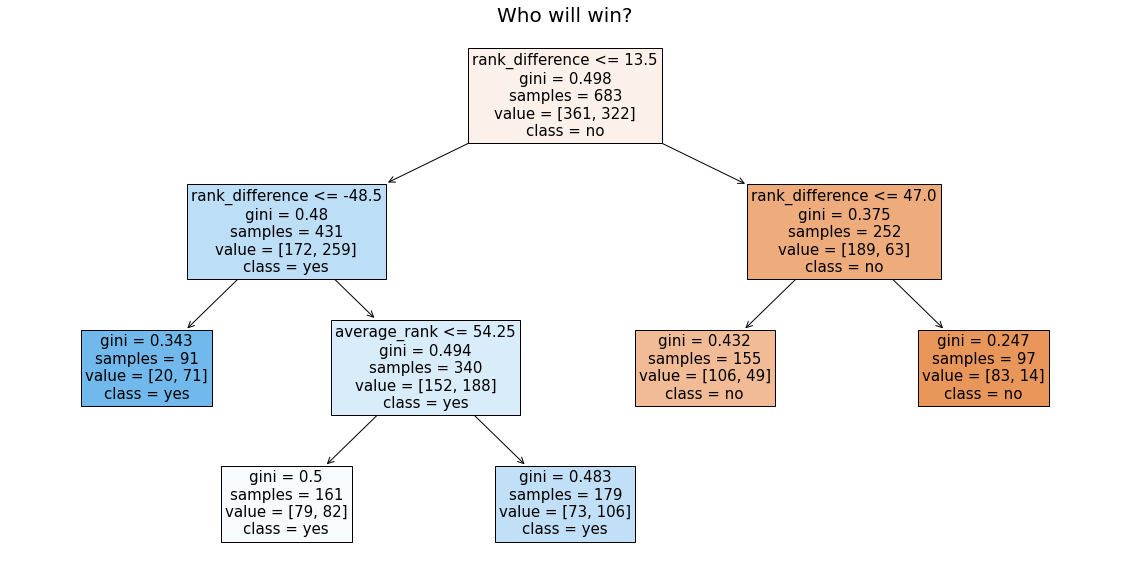

In [26]:
from sklearn.tree import plot_tree

fig, axes = plt.subplots(figsize=(20, 10))
plot_tree(model_dt, feature_names=X.columns, class_names=['no', 'yes'], filled=True, fontsize=15)
plt.title('Who will win?', fontsize=20)
# plt.tight_layout()
plt.show()

## RandomForest

In [63]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100,
                          max_depth = 5,
                          min_samples_leaf = 80,
                          random_state = 42)
model_rf = rf.fit(X_train, y_train)
y_test_pred = model_rf.predict(X_test)
print('Evaluation on Test Set:')
evaluate(y_test, y_test_pred)

Evaluation on Test Set:
Accuracy: 69.01%
Precision: 61.63%
Recall: 72.60%
Fscore: 66.67%


- n_estimators : 40~50-> 0.75
                 60~80 -> 0.76
                 90~600 -> 0.77
                 700~1000 -> 0.76
- max_depth : 3~4 -> 0.77
              5~50 -> 0.78
- min_samples_leaf : 10 -> 0.77
                     20 -> 0.78
                     30~50-> 0.79
                     80 -> 0.8
                     90-> 0.78
                     100 -> 0.77

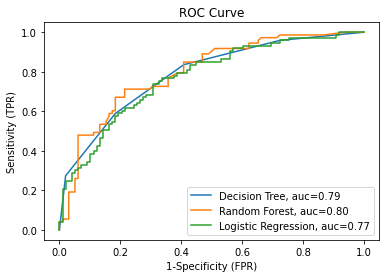

In [117]:
from sklearn.metrics import roc_curve, roc_auc_score

for model, name in zip([model_dt, model_rf, model_lr], 
                     ['Decision Tree', 'Random Forest', 'Logistic Regression']):
    y_test_pred_proba = model.predict_proba(X_test)[:, 1] # probability score of positive class
    fpr, tpr, _ = roc_curve(y_test,  y_test_pred_proba) # get fpr and tpr arrays
    auc = roc_auc_score(y_test, y_test_pred_proba) # get auc
    plt.plot(fpr, tpr, label="{}, auc={:.2f}".format(name, auc))

plt.legend(loc=4)
plt.xlabel('1-Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
plt.title('ROC Curve')
plt.show()

Stakes distribution in the wrong predictions
False    0.607843
True     0.392157
Name: is_stake, dtype: float64
Stakes distribution overall
False    0.533958
True     0.466042
Name: is_stake, dtype: float64


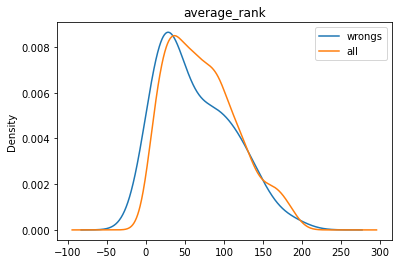

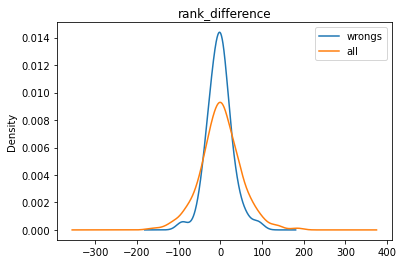

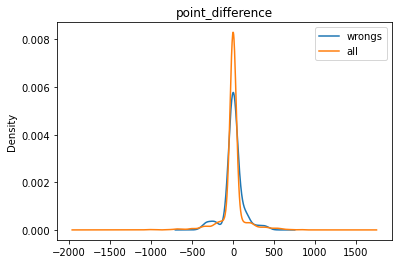

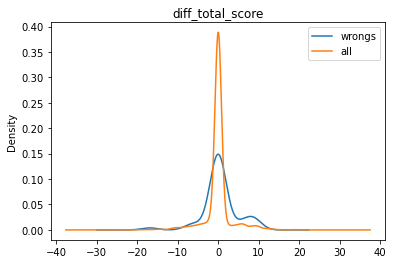

In [29]:
features = ['average_rank', 'rank_difference', 'point_difference','diff_total_score']
wrongs = y_test != model.predict(X_test)

for feature in features:
    plt.figure()
    plt.title(feature)
    X_test.loc[wrongs, feature].plot.kde()
    X.loc[:, feature].plot.kde()
    plt.legend(['wrongs', 'all'])
    
print("Stakes distribution in the wrong predictions")
print(X_test.loc[wrongs, 'is_stake'].value_counts() / wrongs.sum())
print("Stakes distribution overall")
print(X['is_stake'].value_counts() / X.shape[0])

# 4. 월드컵 시뮬레이션

In [30]:
# let's define a small margin when we safer to predict draw then win
margin = 0.05

world_cup_rankings = rankings.loc[(rankings['rank_date'] == rankings['rank_date'].max()) & 
                                    rankings['country_full'].isin(world_cup.index.unique())]
world_cup_rankings = world_cup_rankings.set_index(['country_full'])

In [31]:
# 나라별(공격+수비+미드필더)점수를 더한 가장 최신의 총점수가 포함된 데이터 불러오기 
world_cup_total_score = pd.read_excel('data/월드컵 2022 데이터베이스_총점수반영.xlsx')
world_cup_total_score = world_cup_total_score[['Team','Group','recent_total_score']].set_index('Team')
world_cup_total_score.head()

,Group,recent_total_score
Team,,
Qatar,A,78.888095
Ecuador,A,74.666667
Senegal,A,79.566667
Netherlands,A,83.900000
England,B,73.733333


In [32]:
from itertools import combinations

opponents = ['First match \nagainst', 'Second match\n against', 'Third match\n against']

world_cup['points'] = 0
world_cup['total_prob'] = 0

for group in set(world_cup['Group']):
    print('___Starting group {}:___'.format(group))
    for home, away in combinations(world_cup.query('Group == "{}"'.format(group)).index, 2):
        print("{} vs. {}: ".format(home, away), end='')
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True, np.nan]]), columns=X_test.columns)
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'weighted_points']
        home_total_score = world_cup_total_score.loc[home,'recent_total_score']
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'weighted_points']
        away_total_score = world_cup_total_score.loc[away,'recent_total_score']
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points
        row ['diff_total_score'] = home_total_score - away_total_score
        home_win_prob = model.predict_proba(row)[:,1][0]
        world_cup.loc[home, 'total_prob'] += home_win_prob
        world_cup.loc[away, 'total_prob'] += 1-home_win_prob
        
        points = 0
        if home_win_prob <= 0.5 - margin:
            print("{} wins with {:.2f}".format(away, 1-home_win_prob))
            world_cup.loc[away, 'points'] += 3
        if home_win_prob > 0.5 - margin:
            points = 1
        if home_win_prob >= 0.5 + margin:
            points = 3
            world_cup.loc[home, 'points'] += 3
            print("{} wins with {:.2f}".format(home, home_win_prob))
        if points == 1:
            print("Draw")
            world_cup.loc[home, 'points'] += 1
            world_cup.loc[away, 'points'] += 1

___Starting group G:___
Brazil vs. Serbia: Brazil wins with 0.71
Brazil vs. Switzerland: Brazil wins with 0.58
Brazil vs. Cameroon: Brazil wins with 0.78
Serbia vs. Switzerland: Switzerland wins with 0.67
Serbia vs. Cameroon: Serbia wins with 0.64
Switzerland vs. Cameroon: Switzerland wins with 0.70
___Starting group E:___
Spain vs. Costa Rica: Spain wins with 0.71
Spain vs. Germany: Germany wins with 0.75
Spain vs. Japan: Spain wins with 0.80
Costa Rica vs. Germany: Germany wins with 0.86
Costa Rica vs. Japan: Costa Rica wins with 0.55
Germany vs. Japan: Germany wins with 0.77
___Starting group H:___
Portugal vs. Ghana: Portugal wins with 0.77
Portugal vs. Uruguay: Portugal wins with 0.61
Portugal vs. Korea Republic: Portugal wins with 0.76
Ghana vs. Uruguay: Uruguay wins with 0.79
Ghana vs. Korea Republic: Draw
Uruguay vs. Korea Republic: Uruguay wins with 0.71
___Starting group A:___
Qatar vs. Ecuador: Draw
Qatar vs. Senegal: Senegal wins with 0.81
Qatar vs. Netherlands: Netherlands

## Single-elimination rounds

In [33]:
pairing = [0,3,4,7,8,11,12,15,1,2,5,6,9,10,13,14]

world_cup = world_cup.sort_values(by=['Group', 'points', 'total_prob'], ascending=False).reset_index()
next_round_wc = world_cup.groupby('Group').nth([0, 1]) # select the top 2
next_round_wc = next_round_wc.reset_index()
next_round_wc = next_round_wc.loc[pairing]
next_round_wc = next_round_wc.set_index('Team')

finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']

labels = list()
odds = list()

for f in finals:
    print("___Starting of the {}___".format(f))
    iterations = int(len(next_round_wc) / 2)
    winners = []

    for i in range(iterations):
        home = next_round_wc.index[i*2]
        away = next_round_wc.index[i*2+1]
        print("{} vs. {}: ".format(home,
                                   away), 
                                   end='')
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True, np.nan]]), columns=X_test.columns)
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'weighted_points']
        home_total_score = world_cup_total_score.loc[home,'recent_total_score']
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'weighted_points']
        away_total_score = world_cup_total_score.loc[away,'recent_total_score']
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points
        row ['diff_total_score'] = home_total_score - away_total_score
        
        home_win_prob = model.predict_proba(row)[:,1][0]
        if model.predict_proba(row)[:,1] <= 0.5:
            print("{0} wins with probability {1:.2f}".format(away, 1-home_win_prob))
            winners.append(away)
        else:
            print("{0} wins with probability {1:.2f}".format(home, home_win_prob))
            winners.append(home)

        labels.append("{}({:.2f}) vs. {}({:.2f})".format(world_cup_rankings.loc[home, 'country_abrv'], 
                                                        1/home_win_prob, 
                                                        world_cup_rankings.loc[away, 'country_abrv'], 
                                                        1/(1-home_win_prob)))
        odds.append([home_win_prob, 1-home_win_prob])
                
    next_round_wc = next_round_wc.loc[winners]
    print("\n")

___Starting of the round_of_16___
Netherlands vs. USA: Netherlands wins with probability 0.65
Poland vs. France: France wins with probability 0.55
Germany vs. Croatia: Germany wins with probability 0.73
Brazil vs. Uruguay: Brazil wins with probability 0.59
Senegal vs. England: England wins with probability 0.58
Mexico vs. Denmark: Denmark wins with probability 0.61
Spain vs. Belgium: Belgium wins with probability 0.61
Switzerland vs. Portugal: Portugal wins with probability 0.60


___Starting of the quarterfinal___
Netherlands vs. France: France wins with probability 0.51
Germany vs. Brazil: Germany wins with probability 0.62
England vs. Denmark: Denmark wins with probability 0.60
Belgium vs. Portugal: Belgium wins with probability 0.53


___Starting of the semifinal___
France vs. Germany: Germany wins with probability 0.80
Denmark vs. Belgium: Belgium wins with probability 0.58


___Starting of the final___
Germany vs. Belgium: Germany wins with probability 0.60




## 변수의 영향(중요도 확인)

In [34]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model_rf, scoring = "f1", random_state = 42).fit(X_test, y_test)
eli5.show_weights(perm, top = 80, feature_names = X_test.columns.tolist())

Weight,Feature
0.1580 ± 0.0668,rank_difference
0 ± 0.0000,diff_total_score
0 ± 0.0000,point_difference
-0.0025 ± 0.0193,is_stake
-0.0113 ± 0.0235,average_rank


In [35]:
import numpy as np

indices = np.argsort(model_rf.feature_importances_)[::-1]
for i in indices:
    print('{:<30}: {}'.format(X_train.columns[i], model_rf.feature_importances_[i]))

rank_difference               : 0.6971577713055245
average_rank                  : 0.24940120338022714
is_stake                      : 0.0534410253142484
diff_total_score              : 0.0
point_difference              : 0.0


# 05. 결과
- 0.6의 확률로 독일의 최종 우승이 예상됨
- 우리나라는 아쉽지만 16강에 진출하지 못할 것으로 예상됨